In [237]:
import os
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.word2vec import PathLineSentences, LineSentence, Word2Vec
from pathlib import Path
import networkx as nx
from sklearn import model_selection, linear_model, preprocessing, svm
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
%matplotlib inline


**Load random walks from output files**

The word2vec model requires sentences of strings, so we convert node number to a string.

In [257]:
rw_location = Path("/Users/Ganymedian/Desktop/dynamic-rw/karate/ar")
methods = ["m1", "m2", "m3", "m4"]
# methods = ["m1", "m2", "m3"]
nmethods = len(methods)
vertices = []
for i in range(34):
    vertices.append("v"+str(i+1))
# v = vertices[0]
v="v30"

num_runs = 5
wLength = 21
bucket = 5

In [258]:
# G = nx.karate_club_graph()
G = nx.read_edgelist("/Users/Ganymedian/Desktop/Projects/stellar-random-walk-research/randomwalk/src/test/resources/karate.txt", nodetype=int)
n_nodes = G.number_of_nodes()
A = nx.adjacency_matrix(G,nodelist=sorted(G.nodes())).toarray()
d_w = A.sum(axis=1)
M_theory = A.T / d_w
# print(M_theory)
# print(M_theory.T)

In [274]:
def read_walks(v):
    random_walks_int = []

    for m in methods:
        fname = m
        if m != "m1":
            fname = fname+"-"+v
        print(fname)
        rws = np.concatenate([
            np.loadtxt(f.open(), delimiter='\t', dtype=int)
            for f in rw_location.glob(fname+"-*/part-00000")
            if f.stat().st_size > 0
        ])
        print(rws.shape)
        random_walks_int.append(rws)
    return random_walks_int
    #     random_walks_str = [list(map(str, v)) for v in random_walks_int]

In [275]:
def extract_runs(random_walks_int):
    all_runs = []
    print(num_runs)
    for i in range(nmethods):
        ars = np.vsplit(random_walks_int[i], 5)
        print(ars[0].shape)
        all_runs.append(ars)
    return all_runs


Calculate empirical transition probabilities

In [ ]:
all_runs = extract_runs(read_walks(v))

m1
(17000, 21)
m2-v30
(17000, 21)
m3-v30
(17000, 21)
m4-v30
(17000, 21)
5
(3400, 21)
(3400, 21)
(3400, 21)
(3400, 21)
[0.00201331 0.00137444 0.00106668 0.00093238]
[0.0020973  0.00135032 0.00109253 0.0009408 ]
[0.00208638 0.00132392 0.001053   0.00086474]
[0.00238604 0.00171747 0.0014632  0.00131115]


<function matplotlib.pyplot.show>

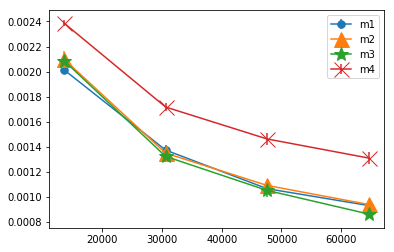

In [276]:
formats=['.-', '^-', '*-','x-']
for mm in range(nmethods):
    all_errors = []
    for rr in range(num_runs):
        errors = []
        x_axis = []
        for ii in range(wLength//bucket):
            walk_length = 5*(ii + 1)

            M_empirical = np.zeros((n_nodes, n_nodes))
            for walk in all_runs[mm][rr]:
                for kk in range(walk_length - 1):
                    M_empirical[walk[kk] - 1, walk[kk + 1] - 1] += 1

            n_samples = M_empirical.sum()
            M_empirical = M_empirical.T / np.maximum(M_empirical.sum(axis=1), 1)

            errors.append(np.abs(M_theory - M_empirical).mean())
            x_axis.append(n_samples)
        all_errors.append(errors)
    n = len(all_errors)
    means = np.mean(all_errors,axis=0)
    print(means)
    stdv = np.std(all_errors, axis=0)
    stderr = stdv/np.sqrt(n)
    plt.errorbar(x_axis, means, yerr=stderr, fmt=formats[mm], label=methods[mm], ms=15)
    plt.legend()
plt.show
# plt.plot(x_axis, all_errors, '.-')

Plot for adding different vertices

In [305]:
def read_walks(m, v):
    fname = m
    if m != "m1":
        fname = fname+"-"+v
    print(fname)
    rws = np.concatenate([
        np.loadtxt(f.open(), delimiter='\t', dtype=int)
        for f in rw_location.glob(fname+"-*/part-00000")
        if f.stat().st_size > 0
    ])
    print(rws.shape)
    ars = np.vsplit(rws, 5)
    print(ars[0].shape)
    return ars
    #     random_walks_str = [list(map(str, v)) for v in random_walks_int]

reading vertex v1
m1
(17000, 21)
(3400, 21)
34
[0.00090205 0.00090205 0.00090205 0.00090205 0.00090205 0.00090205
 0.00090205 0.00090205 0.00090205 0.00090205 0.00090205 0.00090205
 0.00090205 0.00090205 0.00090205 0.00090205 0.00090205 0.00090205
 0.00090205 0.00090205 0.00090205 0.00090205 0.00090205 0.00090205
 0.00090205 0.00090205 0.00090205 0.00090205 0.00090205 0.00090205
 0.00090205 0.00090205 0.00090205 0.00090205]
reading vertex v1
m2-v1
(17000, 21)
(3400, 21)
reading vertex v2
m2-v2
(17000, 21)
(3400, 21)
reading vertex v3
m2-v3
(17000, 21)
(3400, 21)
reading vertex v4
m2-v4
(17000, 21)
(3400, 21)
reading vertex v5
m2-v5
(17000, 21)
(3400, 21)
reading vertex v6
m2-v6
(17000, 21)
(3400, 21)
reading vertex v7
m2-v7
(17000, 21)
(3400, 21)
reading vertex v8
m2-v8
(17000, 21)
(3400, 21)
reading vertex v9
m2-v9
(17000, 21)
(3400, 21)
reading vertex v10
m2-v10
(17000, 21)
(3400, 21)
reading vertex v11
m2-v11
(17000, 21)
(3400, 21)
reading vertex v12
m2-v12
(17000, 21)
(3400, 21)
re

<function matplotlib.pyplot.show>

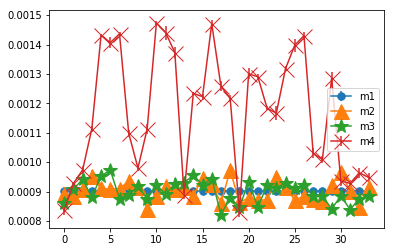

In [306]:
formats=['.-', '^-', '*-','x-']
walk_length = wLength
x_axis = []
for vv in range(34):
    x_axis.append(vv)
for mm in range(nmethods):
    all_errors = []
    for vv in range(34):
        v = "v"+str(vv+1)
        print("reading vertex " + v)
        runs = read_walks(methods[mm], v)
        errors = []
        for rr in range(num_runs):
            M_empirical = np.zeros((n_nodes, n_nodes))
            for walk in runs[rr]:
                for kk in range(walk_length - 1):
                    M_empirical[walk[kk] - 1, walk[kk + 1] - 1] += 1

            n_samples = M_empirical.sum()
            M_empirical = M_empirical.T / np.maximum(M_empirical.sum(axis=1), 1)

            errors.append(np.abs(M_theory - M_empirical).mean())
        if (methods[mm] == "m1"):
            for vv in range(34):
                all_errors.append(errors)
            break;
        all_errors.append(errors)
    n = len(all_errors)
    print(n)
    means = np.mean(all_errors,axis=1)
    print(means)
    stdv = np.std(all_errors, axis=1)
    stderr = stdv/np.sqrt(n)
    plt.errorbar(x_axis, means, yerr=stderr, fmt=formats[mm], label=methods[mm], ms=15)
    plt.legend()
    
plt.show
# plt.plot(x_axis, all_errors, '.-')

In [ ]:
errors_nw = []
x_axis_nw = []
walk_length = random_walks_int.shape[1]
for ii in range(20):
    #walk_length = 5*(ii + 1)
    #walk_lengths.append(walk_length)
    
    num_walks = 5*(ii + 1)

    reduced_walks = []
    for kk in range(1, n_nodes+1):
        reduced_walks.append(
            random_walks_int[random_walks_int[:, 0] == kk][:num_walks]
        )
    reduced_walks = np.concatenate(reduced_walks)
    
    M_empirical = np.zeros((n_nodes, n_nodes))
    for walk in reduced_walks:
        for kk in range(walk_length - 1):
            M_empirical[walk[kk] - 1, walk[kk + 1] - 1] += 1
    n_samples = M_empirical.sum()
    M_empirical = M_empirical.T / np.maximum(M_empirical.sum(axis=1), 1)

    errors_nw.append(np.abs(M_theory - M_empirical).max())
    x_axis_nw.append(n_samples)

plt.plot(x_axis_nw, errors_nw, '.-')
plt.plot(x_axis, errors, '--')

0.9395079594790159
0.028741502372561713
3.3536124073059748


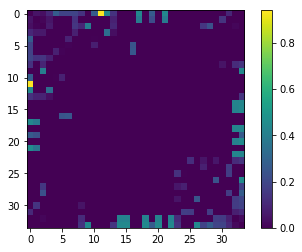

In [117]:
plt.imshow(np.abs(M_theory - M_empirical))
plt.colorbar()
error = np.abs(M_theory - M_empirical).max()
print(error)
error = np.abs(M_theory - M_empirical).mean()
print(error)
error = np.linalg.norm(M_theory - M_empirical)
print(error)

In [ ]:
import sys
sys.path.append("/Users/doc019/Code/stellar-evaluation-plugins")
from utils.epgm import EPGM

Theoretical transition probabilities

In [ ]:
error = np.abs(M_theory - M_empirical).max()
#error = np.linalg.norm(M_theory - M_empirical)
error

Train word2vec embeddings using gensim

In [ ]:
model = Word2Vec(random_walks_str, sg=1, size=20, window=5, sample=0, min_count=0, 
                 workers=4, seed=1321, iter=10, compute_loss=True)

In [ ]:
model.get_latest_training_loss()

Save embeddings

In [ ]:
model.wv.save_word2vec_format("embeddings.out")

Extract embeddings as matrix of size `n_nodes` × `d`

In [ ]:
V_w2v = model.wv.syn0
n_nodes, d_emb = V_w2v.shape

Node labels:

In [ ]:
node_labels = np.zeros(n_nodes)
node_labels[:10] = 1

**Classification using single train/test split**

In [ ]:
# Split using sklearn ShuffleSplit
ss = model_selection.ShuffleSplit(n_splits=1,
                                  train_size=0.6,
                                  test_size=0.4)
train_index, test_index = next(ss.split(V_w2v))

train_data = V_w2v[train_index]
test_data = V_w2v[test_index]
train_labels = node_labels[train_index]
test_labels  = node_labels[test_index]

# Classifier choice
#classifier = linear_model.LogisticRegression(C=10)
classifier = svm.SVC(C=1)

clf = make_pipeline(preprocessing.StandardScaler(), classifier)
clf.fit(train_data, train_labels)

train_pred = clf.predict(train_data)
test_pred = clf.predict(test_data)

print("Train acc:", clf.score(train_data, train_labels))
print("Test acc:", clf.score(test_data, test_labels))
print("Train f1:", f1_score(train_labels, train_pred, average='micro'))
print("Test f1:", f1_score(test_labels, test_pred, average='micro'))

**K-fold cross validation**

In [ ]:
kf = model_selection.KFold(n_splits=4, shuffle=True)

acc_test_scores = []
f1_test_scores = []
for train_index, test_index in kf.split(V_w2v):
    train_data = V_w2v[train_index]
    test_data = V_w2v[test_index]
    train_labels = node_labels[train_index]
    test_labels  = node_labels[test_index]
    
    # Classifier choice
    #classifier = linear_model.LogisticRegression(C=10)
    classifier = svm.SVC(C=1)

    clf = make_pipeline(preprocessing.StandardScaler(), classifier)
    clf.fit(train_data, train_labels)

    train_pred = clf.predict(train_data)
    test_pred = clf.predict(test_data)

    acc_train = clf.score(train_data, train_labels)
    acc_test = clf.score(test_data, test_labels)
    f1_train = f1_score(train_labels, train_pred, average='micro')
    f1_test = f1_score(test_labels, test_pred, average='micro')
    
    acc_test_scores.append(acc_test)
    f1_test_scores.append(f1_test)
    
    print("Train acc={:4f},  Test acc={:4f},  Train f1={:4f},  Test f1={:4f}".format(
        acc_train, acc_test, f1_train, f1_test
    ))
    
print("Average scores:")
print("Avg test acc={:4f} [±{:2f}],  Avg test f1={:4f} [±{:2f}]".format(
    np.mean(acc_test_scores), np.std(acc_test_scores), 
    np.mean(f1_test_scores), np.std(f1_test_scores)
))